In [1]:
%matplotlib inline

In [2]:
import numpy as np
import openturns as ot
import matplotlib.pyplot as plt
import ctbenchmark as ctb

# Peak problem description

In [3]:
peak_problem = ctb.CentralTendencyPeakProblem()
peak_function = peak_problem.getFunction()
peak_dist = peak_problem.getDistribution()

In [4]:
peak_problem.getMean()

2.510688027976321

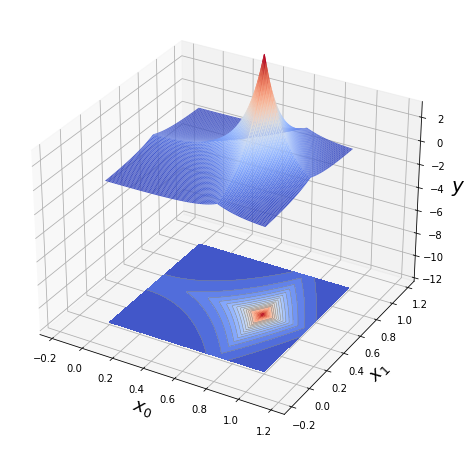

In [5]:
d = ctb.DrawFunctions()
fig = d.draw_full_3D(peak_function, 'Gaussian peak function', -12)
fig

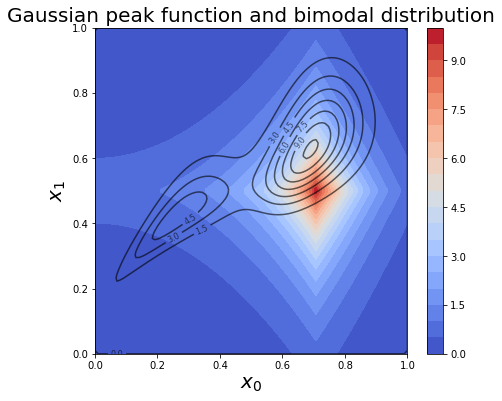

In [6]:
fig = d.draw_2D_controur('Gaussian peak function and bimodal distribution', peak_function, peak_dist)
fig;

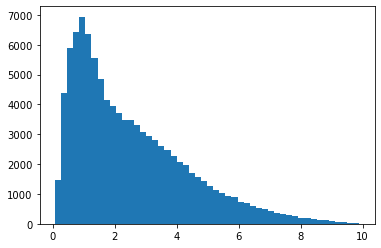

In [7]:
## Output pdf illustration
output_rv = peak_problem.getRandomVector()
output_sample = output_rv.getSample(100000)
plt.hist(np.array(output_sample).flatten(), 50);

## Adaptive Kriging Damage Assessment 

In [8]:
# Initial design (Sobol sequence)
doe = ctb.DesignOfExperiments()
initial_size = 10
initial_design = doe.sobol_sample(initial_size, peak_dist)
initial_observations = peak_function(initial_design)
# AKDA
akda_size = 20
akda = ctb.AKDA(None, peak_dist, 2**12, initial_design, initial_observations)
akda_design, design_indices, observations = akda.select_design(akda_size, peak_function)

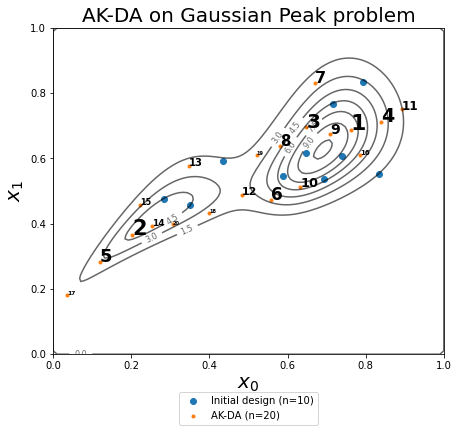

In [9]:
fig = d.draw_2D_controur('AK-DA on Gaussian Peak problem', None, peak_dist)
plt.scatter(initial_design[:, 0], initial_design[:, 1], label='Initial design (n={})'.format(initial_size), marker='o')
plt.scatter(akda_design.getMarginal(0), akda_design.getMarginal(1), label='AK-DA (n={})'.format(akda_size), marker='.', color='C1')
for i in range(akda_size):
    fsize = np.max((22 - i, 5))
    plt.text(akda_design.getMarginal(0)[i][0], akda_design.getMarginal(1)[i][0], "{}".format(i + 1), weight="bold", fontsize=fsize)
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center');

## aMSE criterion

In [10]:
# aMSE
aMSE = ctb.aMSE(None, peak_dist, 2**8, initial_design, initial_observations)
aMSE_design, aMSE_design_indices, aMSE_observations = aMSE.select_design(akda_size, peak_function)

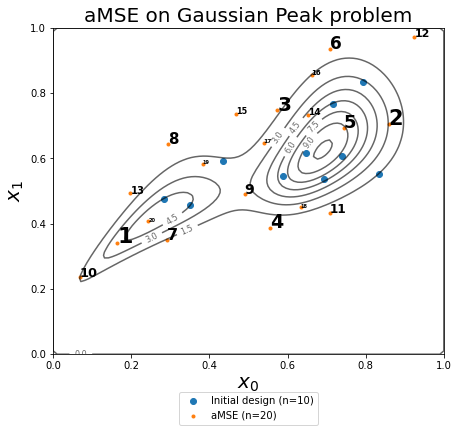

In [11]:
fig = d.draw_2D_controur('aMSE on Gaussian Peak problem', None, peak_dist)
plt.scatter(initial_design[:, 0], initial_design[:, 1], label='Initial design (n={})'.format(initial_size), marker='o')
plt.scatter(aMSE_design.getMarginal(0), aMSE_design.getMarginal(1), label='aMSE (n={})'.format(akda_size), marker='.', color='C1')
for i in range(akda_size):
    fsize = np.max((22 - i, 5))
    plt.text(aMSE_design.getMarginal(0)[i][0], aMSE_design.getMarginal(1)[i][0], "{}".format(i + 1), weight="bold", fontsize=fsize)
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center');

## Kernel based sampling methods

In [12]:
doe = ctb.DesignOfExperiments()
N = 20
# MC 
mc_sample = np.array(peak_dist.getSample(N))
# Sobol sequence
sobol_sample = doe.sobol_sample(N, peak_dist)
# Support points
sp_sample = doe.greedy_support_points_sample(N, peak_dist)[0]
# Kernel herding
kh_sample = doe.kernel_herding_sample(N, peak_dist)

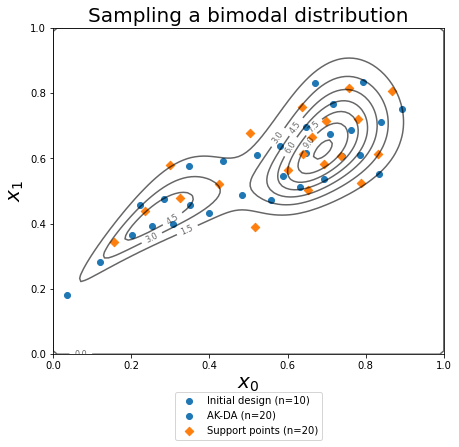

In [13]:
fig = d.draw_2D_controur('Sampling a bimodal distribution', None, peak_dist)
plt.scatter(initial_design[:, 0], initial_design[:, 1], label='Initial design (n={})'.format(initial_size), marker='o')
plt.scatter(akda_design.getMarginal(0), akda_design.getMarginal(1), label='AK-DA (n={})'.format(akda_size), marker='o', color='C0')
plt.scatter(sp_sample[:, 0], sp_sample[:, 1], label='Support points (n={})'.format(N), marker='D', color='C1')
#plt.scatter(kh_sample[:, 0], kh_sample[:, 1], label='Kernel Herding (n={})'.format(N), marker='X', color='C2')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center');